Bộ dữ liệu này cung cấp một bộ sưu tập toàn diện các thuộc tính được tạo ngẫu nhiên liên quan đến ô tô, bao gồm các thương hiệu, kiểu máy và đặc điểm khác nhau. Với hơn 3000 mục, bộ dữ liệu tổng hợp này cung cấp một đại diện đa dạng của ô tô, làm cho nó lý tưởng cho một loạt các nhiệm vụ phân tích và mô hình hóa trong lĩnh vực ô tô. ***Mục đích là xây dựng mô hình phân tích thăm dò chuyên sâu để khám phá các xu hướng, mô hình và mối tương quan trong lĩnh vực ô tô..**

In [194]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,StandardScaler 
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
import warnings
warnings.filterwarnings('ignore')

import pickle 

np.random.seed(0)

In [195]:
train=pd.read_csv("Car_Data.csv")
test=pd.read_csv("test_data.csv")

In [196]:
train.head()

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,22932,65732,New
1,2,Jaguar,Generic Model 2,2003,Silver,89937,58620,New
2,3,Land Rover,Generic Model 2,2022,Green,36616,50574,New
3,4,Porsche,Generic Model 2,1997,Black,82812,35436,Used
4,5,Land Rover,Generic Model 3,2000,Black,184616,63880,Used


In [197]:
test.head()

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,67094,BMW,Generic Model 1,1995,Silver,58282,51669,Used
1,75836,Ford,Edge,1990,Black,151004,55536,Used
2,70866,Lexus,Generic Model 2,2011,Black,188875,7234,Used
3,95421,Jaguar,Generic Model 2,2003,Silver,94720,35986,Used
4,93758,Volvo,Generic Model 2,2004,Blue,111377,14320,New


## Kiểm tra và cho biết thông tin về dataset


In [198]:
train.Brand.value_counts()

Brand
Ford             5132
Lexus            5124
Tesla            5087
Volvo            5083
Chevrolet        5062
Toyota           5062
Nissan           5054
Porsche          5024
Volkswagen       4982
Honda            4982
Jeep             4969
Hyundai          4960
Audi             4953
Jaguar           4933
BMW              4920
Land Rover       4917
Kia              4910
Subaru           4898
Mazda            4898
Mercedes-Benz    4862
-Benz             114
Name: count, dtype: int64

Chúng ta có thể thấy là các thương hiệu có mặt tại datasheet này là Ford, Lexus, Tesla, Toyota, Porsche, Honda,...

Chúng ta có thể thấy thương hiệu có số lượng lớn nhất là Ford với 5133 và thương hiệu với số lượng ít nhất là Subaru với 4899

In [199]:
#kiểm tra dữ liệu của các cột
train.dtypes

ID            int64
Brand        object
Model        object
Year          int64
Color        object
Mileage       int64
Price         int64
Condition    object
dtype: object

In [200]:
row_count,column_count=train.shape

In [201]:
print('Rows',row_count)
print('Columns',column_count)

Rows 100000
Columns 8


In [202]:
row_count,column_count=test.shape

In [203]:
print('Rows',row_count)
print('Columns',column_count)

Rows 9226
Columns 8


In [204]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID         100000 non-null  int64 
 1   Brand      99926 non-null   object
 2   Model      99878 non-null   object
 3   Year       100000 non-null  int64 
 4   Color      100000 non-null  object
 5   Mileage    100000 non-null  int64 
 6   Price      100000 non-null  int64 
 7   Condition  100000 non-null  object
dtypes: int64(4), object(4)
memory usage: 6.1+ MB


### Các cột dữ liệu
* **ID** : Mã định danh duy nhất cho mỗi lần nhập xe.
* **Brand**: Thương hiệu xe hơi được tạo ngẫu nhiên, có nhiều nhà sản xuất.
* **Model** : Mẫu xe tương ứng dựa trên thương hiệu đã chọn, đưa ra các tùy chọn đa dạng để phân tích.
* **Year** : Năm sản xuất được chỉ định ngẫu nhiên, kéo dài từ năm 1990 đến năm 2022, đại diện cho tuổi của xe.
* **Color** : Màu sắc được chọn ngẫu nhiên cho mỗi mục nhập xe, cung cấp một đại diện trực quan về sự đa dạng giữa các phương tiện.
* **Mileage**: Số dặm được tạo ngẫu nhiên của xe, cho biết quãng đường đã đi và khả năng hao mòn.
* **Price** : Giá được chỉ định ngẫu nhiên của chiếc xe, tạo điều kiện phân tích dựa trên khía cạnh tài chính.
* **Condition** :Cho biết chiếc xe là mới hay đã qua sử dụng, cung cấp thông tin chi tiết về trạng thái hiện tại của nó.

In [205]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000.0,NaN,NaN,NaN,50000.5,28867.657797,1.0,25000.75,50000.5,75000.25,100000.0
Brand,99926,21,Ford,5132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,99878,21,Generic Model 1,28278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,100000.0,NaN,NaN,NaN,2006.03409,9.52722,1990.0,1998.0,2006.0,2014.0,2022.0
Color,100000,6,Blue,16786,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,100000.0,NaN,NaN,NaN,99819.395,57710.087058,2.0,49996.25,99807.0,149841.25,199998.0
Price,100000.0,NaN,NaN,NaN,42534.51937,21632.296692,5000.0,23826.75,42563.5,61197.5,80000.0
Condition,100000,2,Used,50033,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
(train.isnull().sum()/train.shape[0])*100

ID           0.000
Brand        0.074
Model        0.122
Year         0.000
Color        0.000
Mileage      0.000
Price        0.000
Condition    0.000
dtype: float64

In [207]:
train.isnull().sum().sort_values(ascending=False)

Model        122
Brand         74
ID             0
Year           0
Color          0
Mileage        0
Price          0
Condition      0
dtype: int64

### Có thể thấy rằng 
**122 giá bị bị thiếu trong Model**

**74 giá trị bị thiếu trong Brand**


In [208]:
train['Year'].unique()

array([2003, 2022, 1997, 2000, 2014, 2009, 1992, 2001, 1998, 1999, 1993,
       2016, 2008, 2011, 2019, 2004, 1990, 2012, 2010, 2006, 1996, 2005,
       1994, 2021, 2007, 2013, 2015, 1995, 2002, 2018, 1991, 2017, 2020],
      dtype=int64)

In [209]:
train['Brand'].value_counts()

Brand
Ford             5132
Lexus            5124
Tesla            5087
Volvo            5083
Chevrolet        5062
Toyota           5062
Nissan           5054
Porsche          5024
Volkswagen       4982
Honda            4982
Jeep             4969
Hyundai          4960
Audi             4953
Jaguar           4933
BMW              4920
Land Rover       4917
Kia              4910
Subaru           4898
Mazda            4898
Mercedes-Benz    4862
-Benz             114
Name: count, dtype: int64

**"Brand" này có thể cực kỳ quan trọng** đối với phần lập mô hình vì chỉ có 21 giá trị tương ứng chính xác với 21 thương hiệu trong đó dữ liệu đã được thu thập

In [210]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9226 entries, 0 to 9225
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         9226 non-null   int64 
 1   Brand      9184 non-null   object
 2   Model      9192 non-null   object
 3   Year       9226 non-null   int64 
 4   Color      9226 non-null   object
 5   Mileage    9226 non-null   int64 
 6   Price      9226 non-null   int64 
 7   Condition  9226 non-null   object
dtypes: int64(4), object(4)
memory usage: 576.8+ KB


### Phân tích đơn biến


In [211]:
num_cols=train.select_dtypes(include=np.number).columns
num_cols

Index(['ID', 'Year', 'Mileage', 'Price'], dtype='object')

In [212]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,50000.50000,28867.657797,1.0,25000.75,50000.5,75000.25,100000.0
Year,100000.0,2006.03409,9.527220,1990.0,1998.00,2006.0,2014.00,2022.0
Mileage,100000.0,99819.39500,57710.087058,2.0,49996.25,99807.0,149841.25,199998.0
Price,100000.0,42534.51937,21632.296692,5000.0,23826.75,42563.5,61197.50,80000.0


### Tiền xử lý

In [213]:
train['Brand'] = train['Brand'].fillna('Other')
train['Model'] = train['Model'].fillna('Unknown')

In [214]:
train.isnull().sum()

ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64

In [215]:
test['Brand'] = test['Brand'].fillna('Other')
test['Model'] = test['Model'].fillna('Unknown')

In [216]:
test.isnull().sum()

ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64

### Vẽ biểu đồ

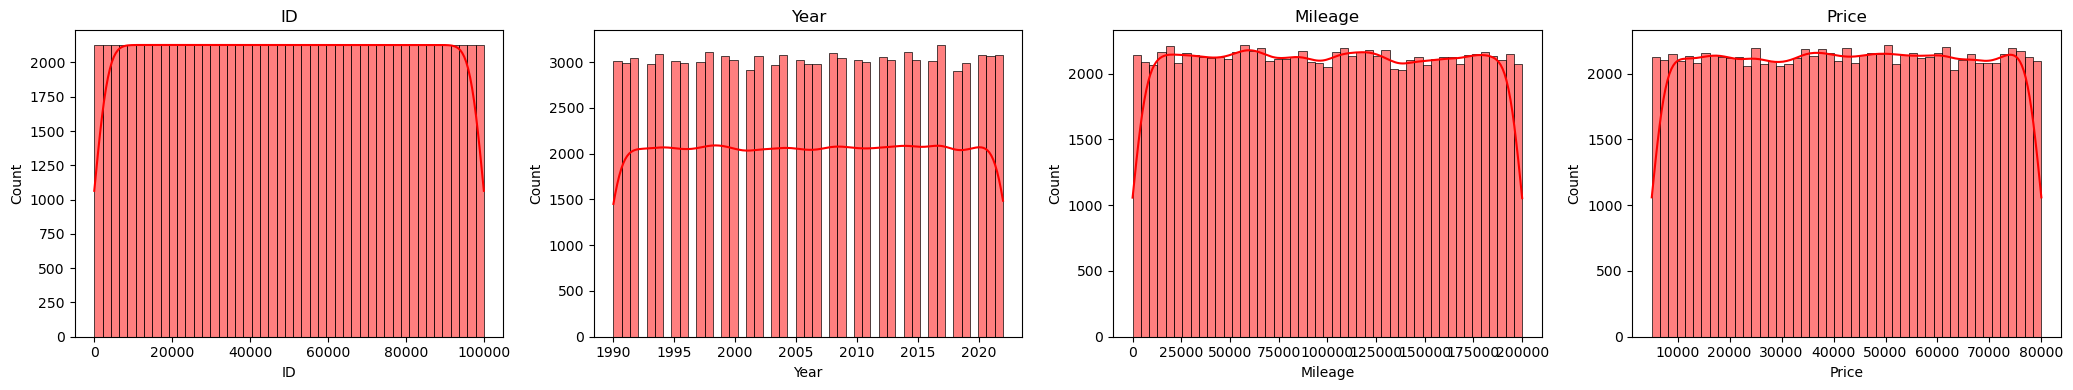

In [217]:
# hàm này sẽ vẽ biểu đồ phân phối của các biến số

# Xác định danh sách các cột số trong DataFrame train
num_cols = train.select_dtypes(include='number').columns.tolist()

# Vẽ biểu đồ phân phối của các biến số
plt.figure(figsize=(26, 4))
t = 1
for i in num_cols:
    plt.subplot(1, 5, t)
    sns.histplot(train[i], kde=True, color='red')  
    t += 1
    plt.title(i)
plt.tight_layout()
plt.show()


### Nhận xét:
* Quan sát thấy mã định danh của ô tô nằm trong khoảng từ 0-100000.
* Năm sản xuất hay tuổi thọ của ô tô nằm trong khoảng từ 1990 đến 2020 và mỗi năm đều có số lượng xe từ 1500-2000.
* Quảng đường đã đi hay khả năng hao mòn của xe nằm trong khoảng từ 0 đến 200000 và số lượng quảng đường đã đi trung bình từ 25000 đến hơn 80000 là nhiều nhất.
* Giá cả của xe cũng có sự tương đồng trong khoảng dưới 10000 đến 80000 trong đó mỗi giá đều có khoảng số lượng xe từ 1000-2000 và chúng ta có thể thấy số lượng xe có giá trị thấp và giá trị cao có số lượng xe ít hơn so với các giá trong khoảng trung bình - khá (15000-75000).

In [218]:
nums_cols=test.select_dtypes(include=np.number).columns
nums_cols

Index(['ID', 'Year', 'Mileage', 'Price'], dtype='object')

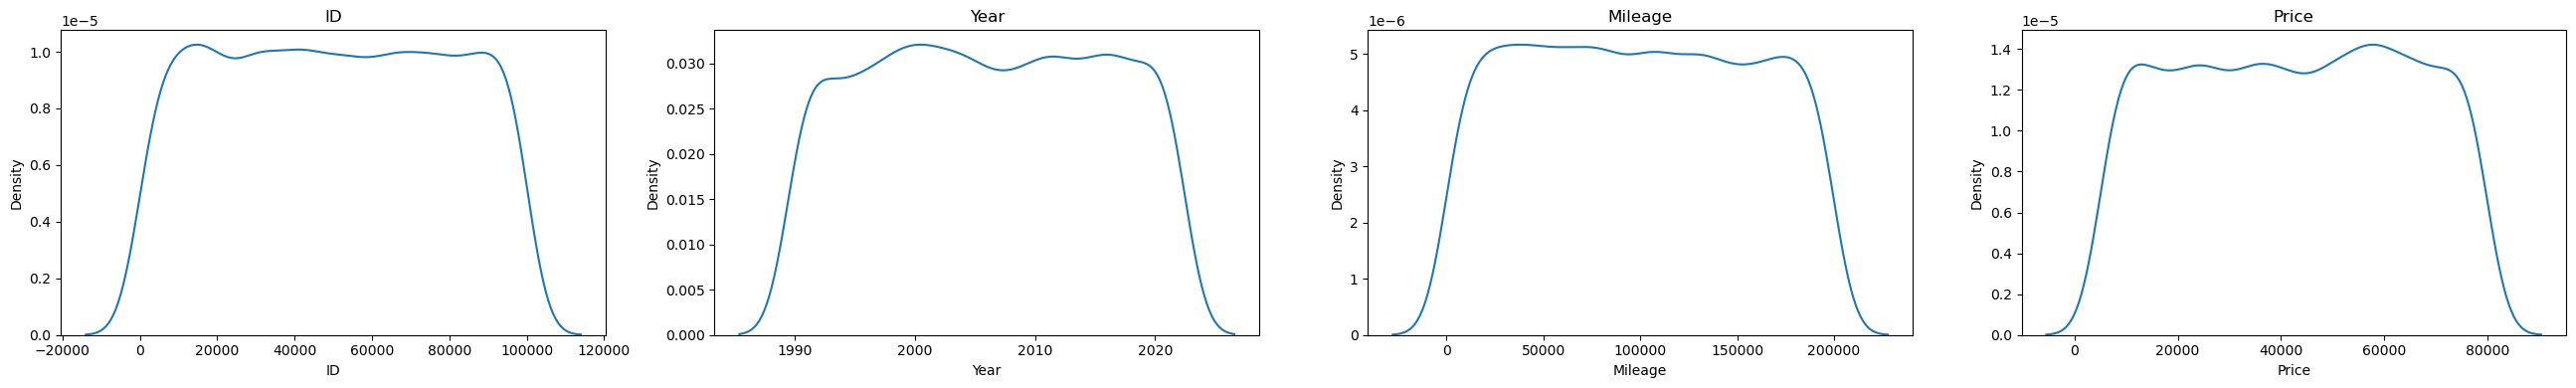

In [219]:
plt.figure(figsize=(26,4))
t=1
for i in nums_cols:
    plt.subplot(1,4,t)
    sns.kdeplot(test[i])
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

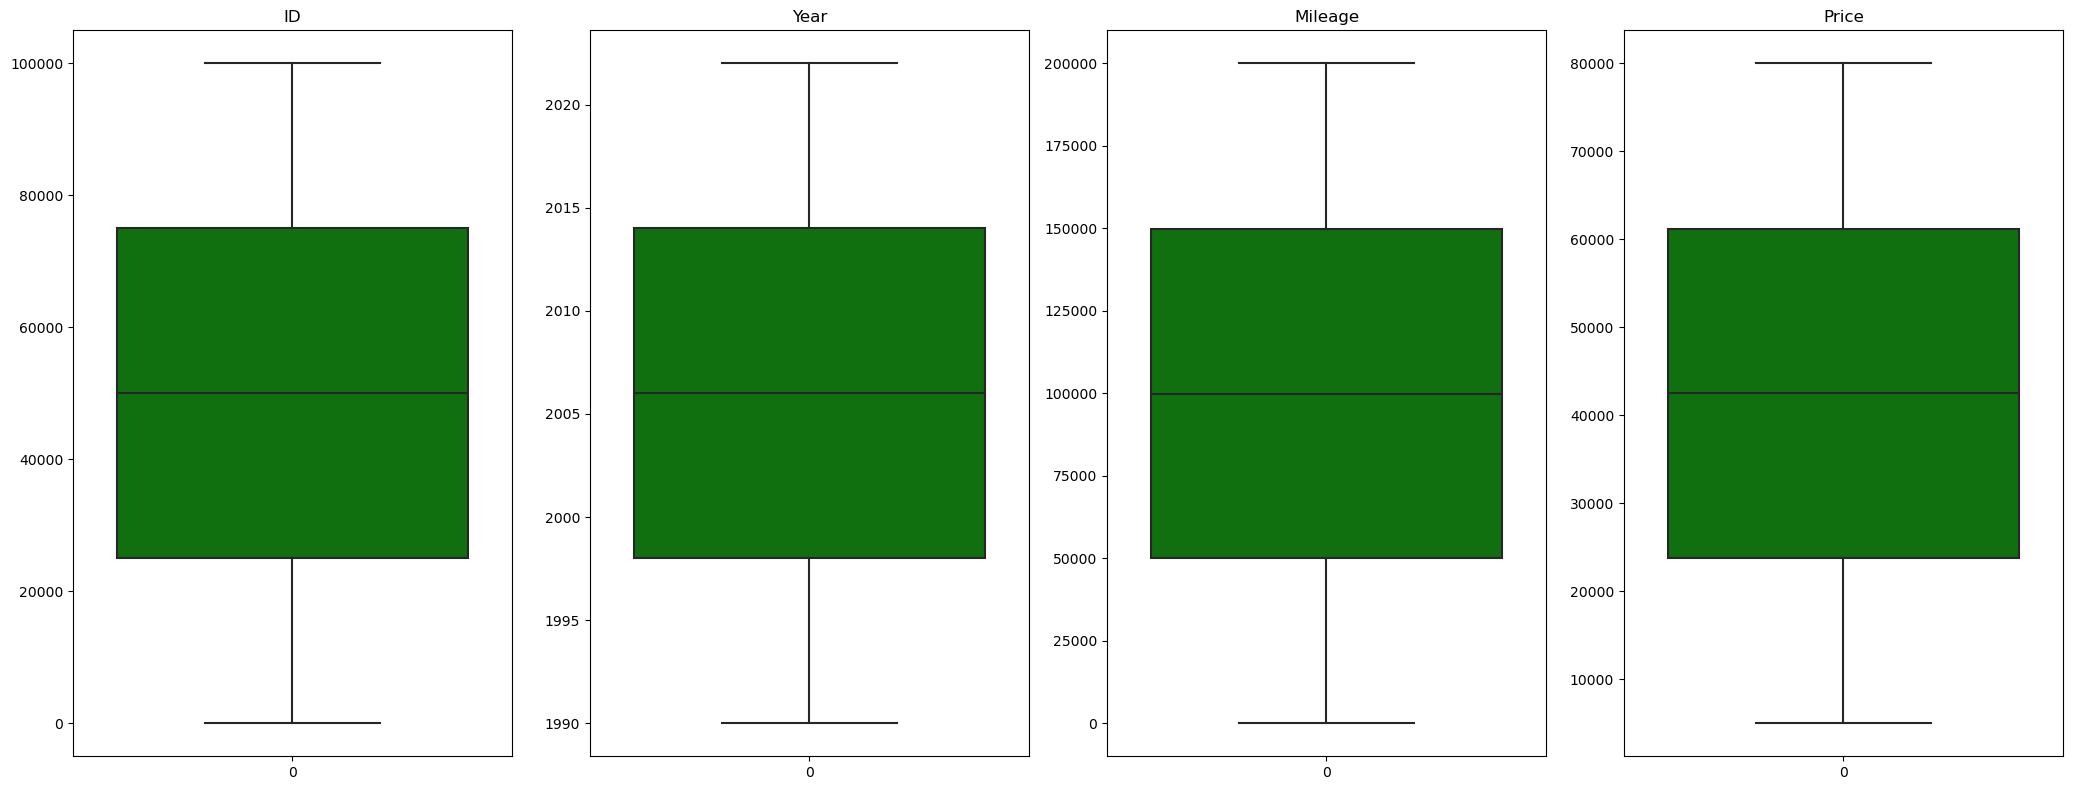

In [220]:
plt.figure(figsize=(26,8))
t=1
for i in num_cols:
    plt.subplot(1,5,t)
    sns.boxplot(train[i],color='green')
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

### Nhận xét: 
* Hầu như không có ngoại lệ trong các cột ID, YEAR, MILEAGE và PRICE. 
* Dữ liệu train và dữ liệu test có phân phối gần như giống nhau

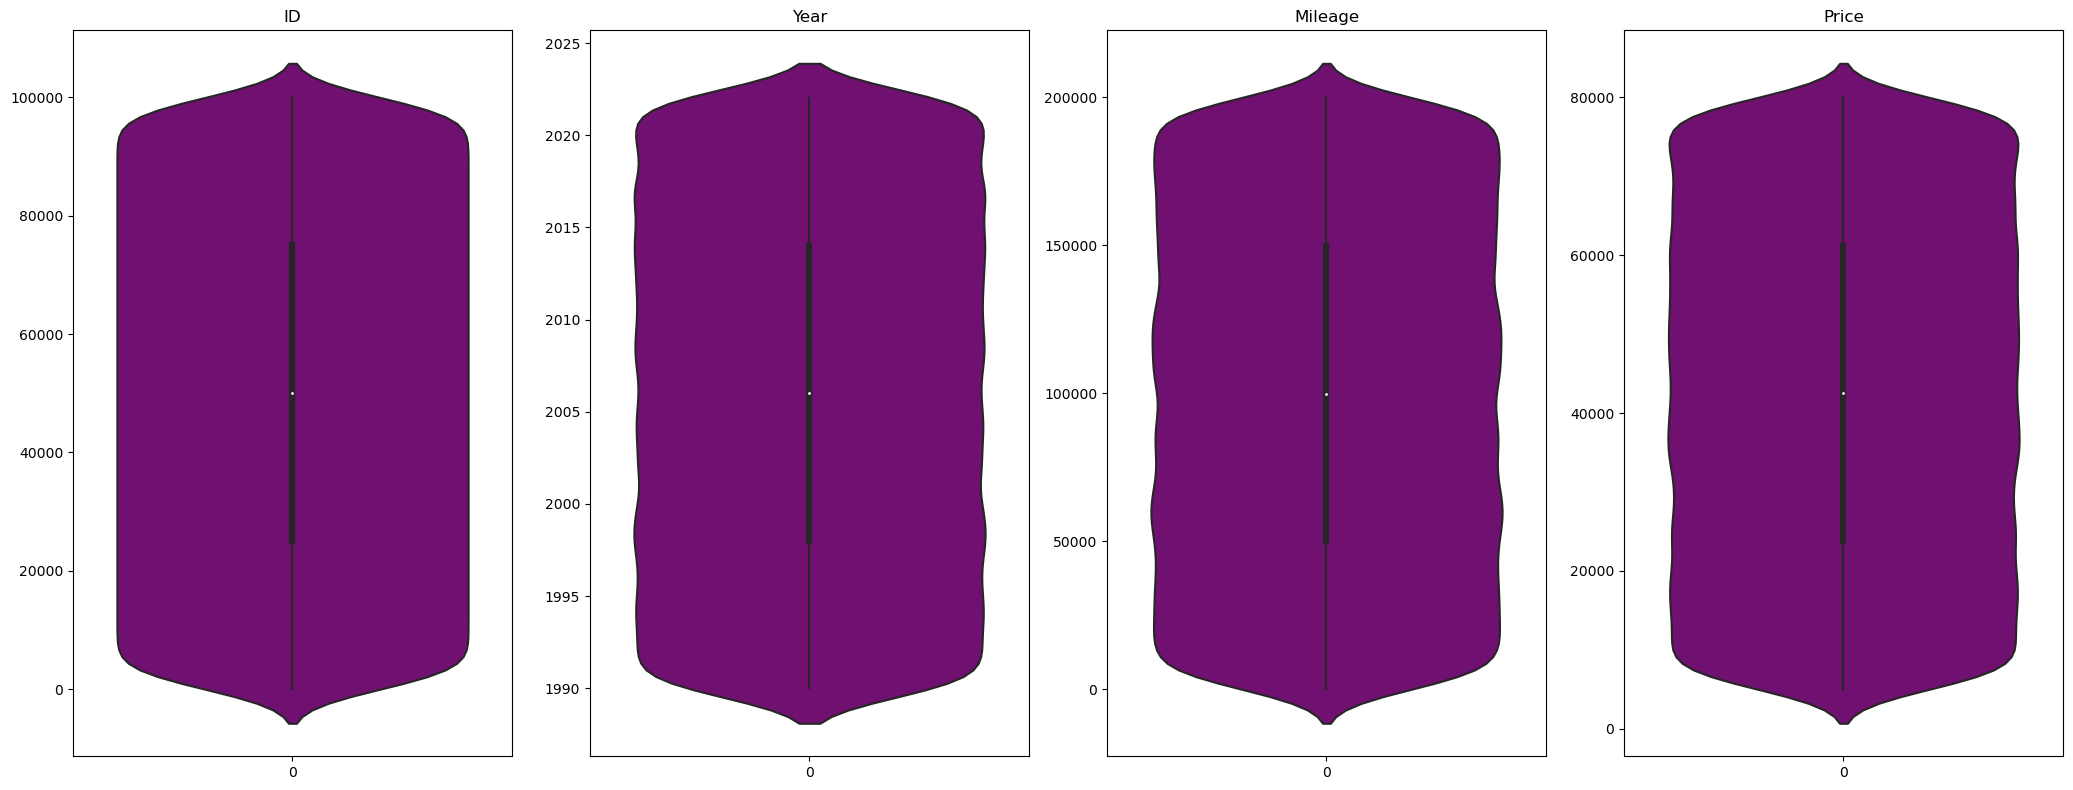

In [221]:
plt.figure(figsize=(26,8))
t=1
for i in num_cols:
    plt.subplot(1,5,t)
    sns.violinplot(data=train[i],color='purple') # violinplot sẽ vẽ biểu đồ phân phối của biến số
    t=t+1
    plt.title(i)
plt.tight_layout() # tự động căn chỉnh biểu đồ
plt.show()

Các biểu đồ này xác nhận **Không có những ngoại lệ** trong những quan sát ở trên về các ngoại lệ trong các cột

In [222]:
cat_cols=train.select_dtypes(include='object').columns
cat_cols

Index(['Brand', 'Model', 'Color', 'Condition'], dtype='object')

In [223]:
for i in cat_cols:
    
    print(f"Number of values in the {i} column is:\n{train[i].value_counts() }")
print( )
print('--' * 30)

Number of values in the Brand column is:
Brand
Ford             5132
Lexus            5124
Tesla            5087
Volvo            5083
Toyota           5062
Chevrolet        5062
Nissan           5054
Porsche          5024
Honda            4982
Volkswagen       4982
Jeep             4969
Hyundai          4960
Audi             4953
Jaguar           4933
BMW              4920
Land Rover       4917
Kia              4910
Mazda            4898
Subaru           4898
Mercedes-Benz    4862
-Benz             114
Other              74
Name: count, dtype: int64
Number of values in the Model column is:
Model
Generic Model 1    28278
Generic Model 2    28241
Generic Model 3    28144
F-150                893
RAV4                 884
Explorer             876
Mustang              866
Prius                862
CR-V                 860
Focus                857
Edge                 855
Civic                843
Accord               837
Camry                833
Corolla              832
Fit                  

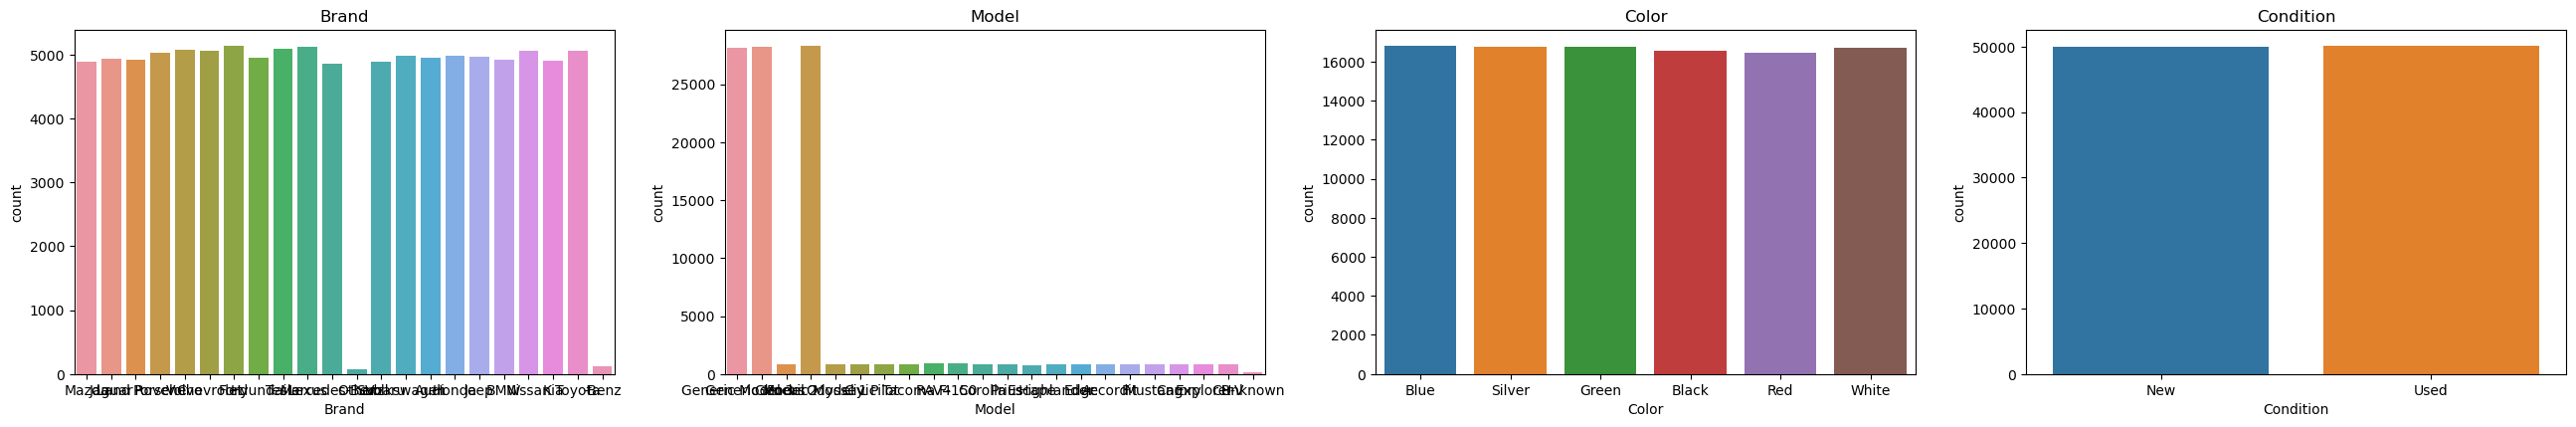

In [224]:
# hàm này sẽ tính số lượng các giá trị trong các biến phân loại
plt.figure(figsize=(26,8))
t=1
for i in cat_cols:
    plt.subplot(2,4,t)
    sns.countplot(data=train, x=i)
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

In [225]:
categorical_cols_to_display = [ 
                                 'Brand',
                                 'Model',
                                 'Color',
                                 'Condition'
                                ]
# biến categorical_cols_to_display dùng để lọc các biến phân loại cần phân tích

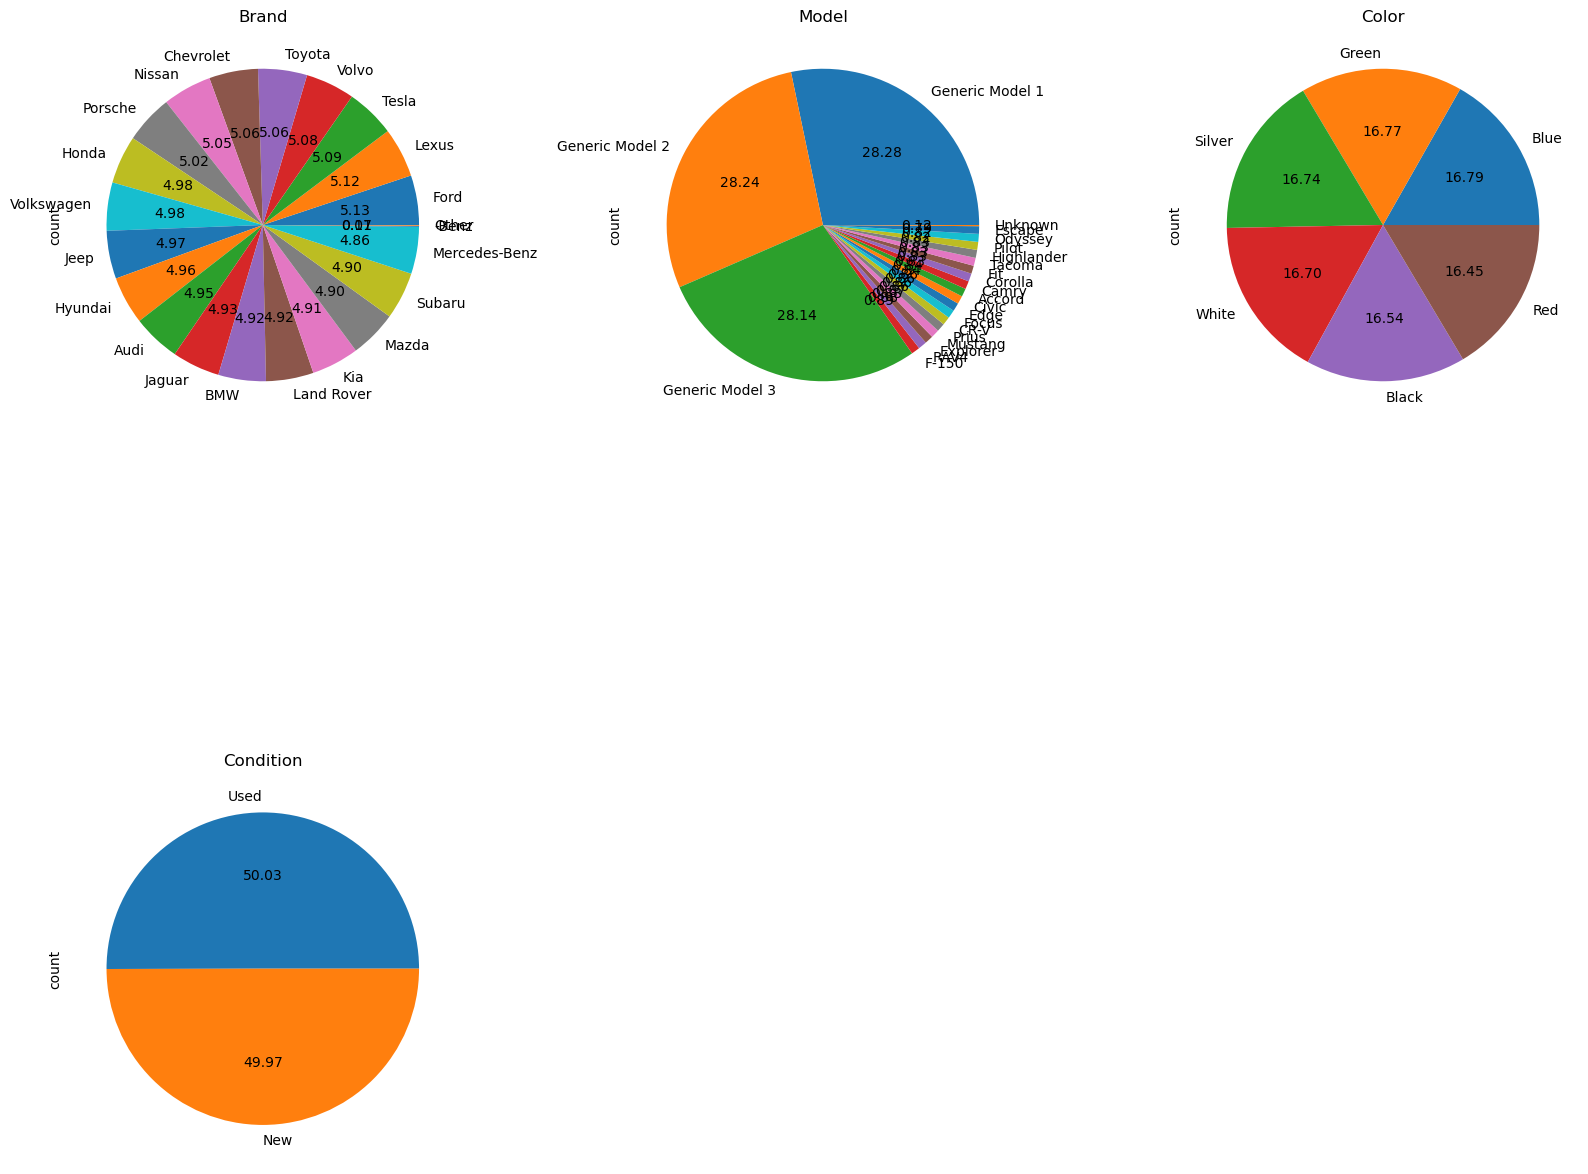

In [226]:
plt.figure(figsize=(16,16))
t=1
for i in categorical_cols_to_display:
    plt.subplot(2,3,t)
    train[i].value_counts().plot(kind='pie',autopct='%.2f')
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()
# hàm này sẽ vẽ biểu đồ tròn của các biến phân loại

### Nhận xét:
* Qua biểu đồ ta thấy hầu như đều có sự tương đối giữa cái brand, color, condition
* Có số lượng model có ít sản phẩm như Escape, Camry, F-150, Corolla,... hầu như mỗi model này đều chỉ chiếm khoảng 0.5-0.9% tổng các model

### PHÂN TÍCH ĐA BIẾN

In [227]:
nums=['Brand', 'Model', 'Condition']

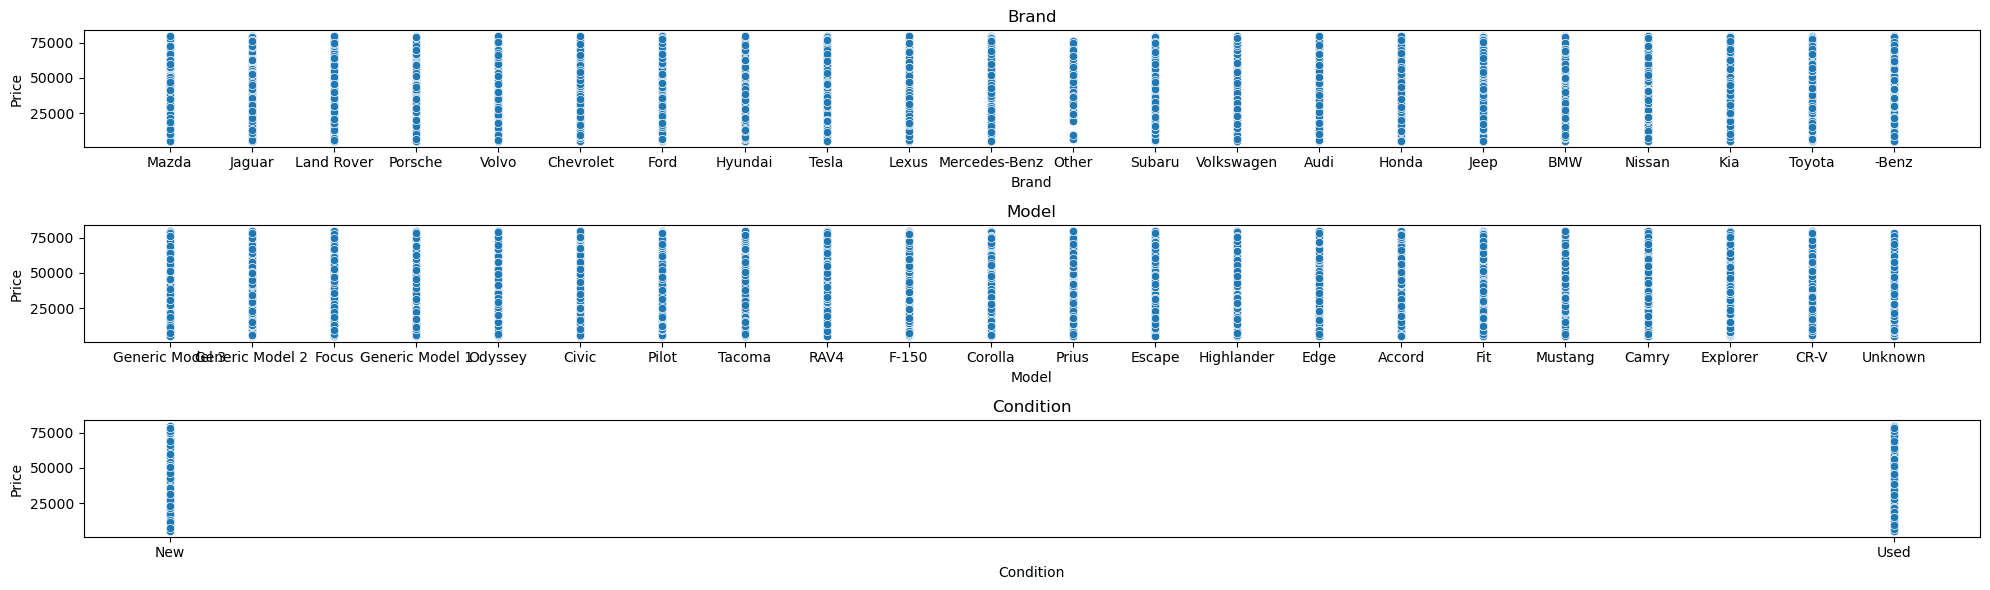

In [228]:
plt.figure(figsize=(20,6))
t=1
for i in nums:
    plt.subplot(3,1,t)
    sns.scatterplot(data=train,x=i,y='Price')
    # hàm scatterplot sẽ vẽ biểu đồ phân tán 
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

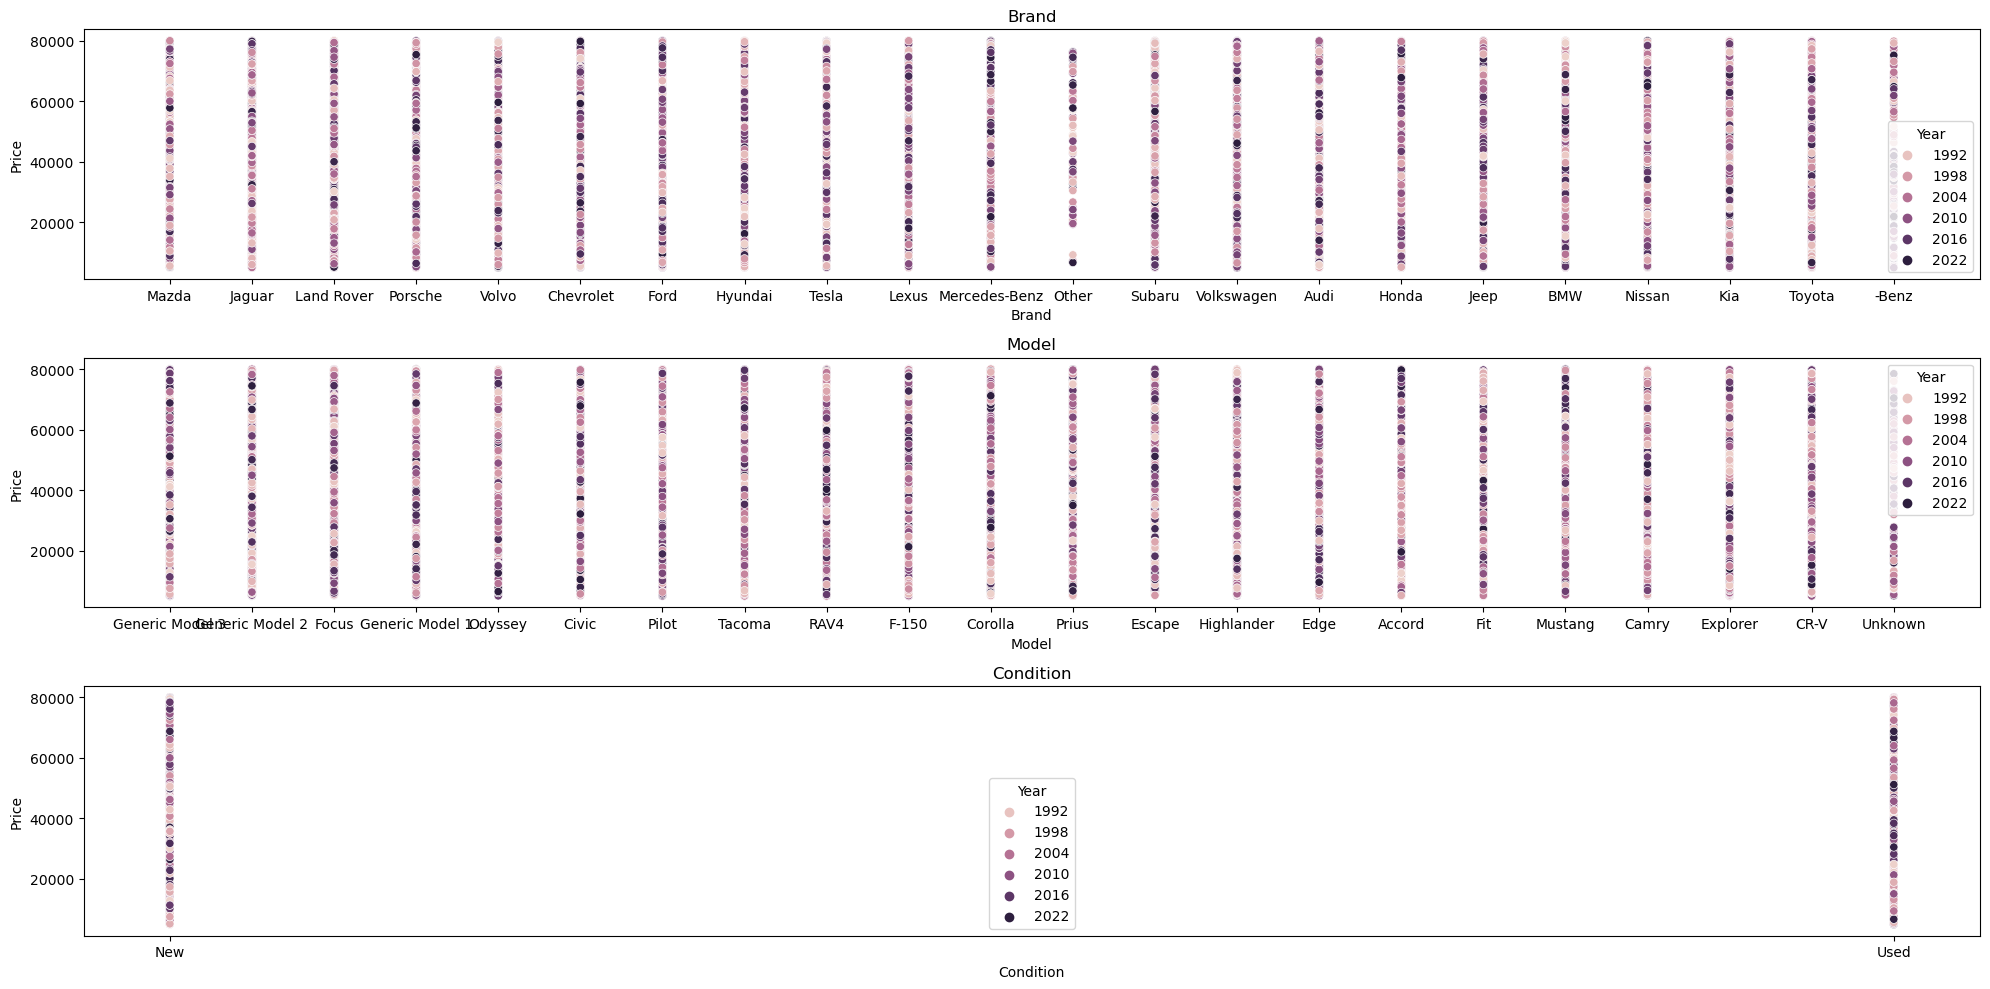

In [229]:
plt.figure(figsize=(20,10))
t=1
for i in nums:
    plt.subplot(3,1,t)
    sns.scatterplot(data=train,x=i,y='Price',hue='Year')
    # hàm scatterplot sẽ vẽ biểu đồ phân tán với màu sắc phân loại theo biến Year
    t=t+1
    plt.title(i)
plt.tight_layout()
plt.show()

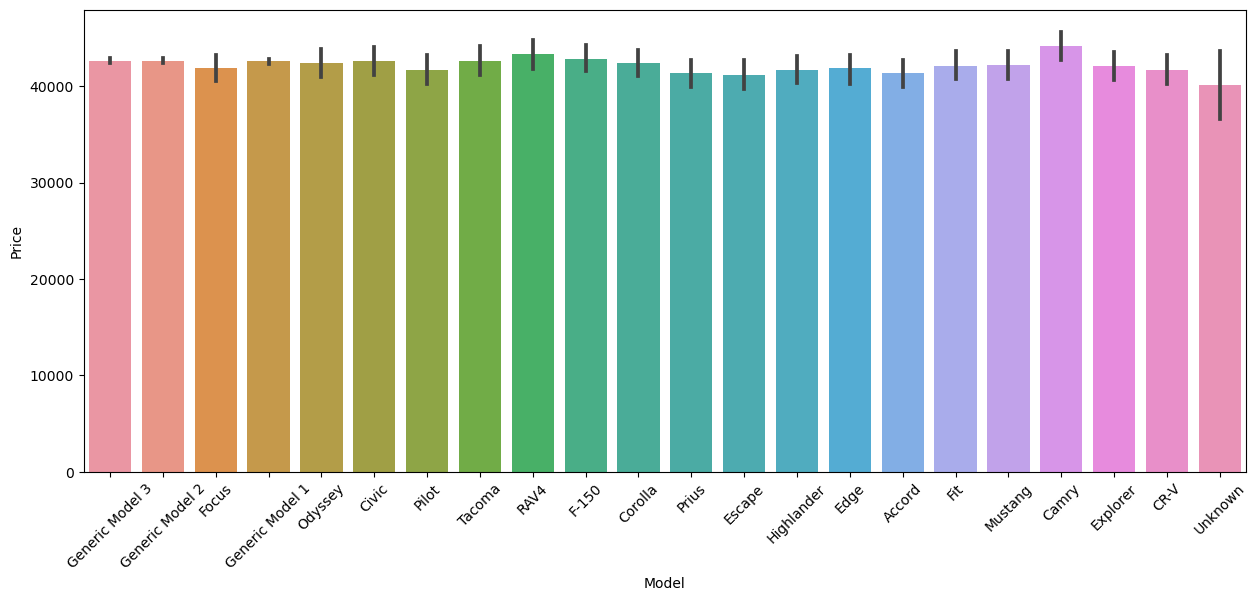

In [230]:
plt.figure(figsize=(15, 6))  # Đặt kích thước của hình
sns.barplot(data=train, x='Model', y='Price')
plt.xticks(rotation=45)  # Xoay nhãn trục x 90 độ để dễ đọc
plt.show()

In [231]:
# chức năng phát hiện các ngoại lệ bằng phương pháp IQR
# phương pháp IQR sẽ xác định các giá trị ngoại lệ dựa trên khoảng cách giữa Q1 và Q3
def detect_outliers(df,feature):
    q1=df[feature].quantile(0.25)
    q3=df[feature].quantile(0.75)
    IQR=q3-q1
    
    upper_limit=q3+1.5*IQR
    lower_limit=q1-1.5*IQR
    return upper_limit,lower_limit

upper,lower=detect_outliers(train,'Price')
print('Upper limit: ',upper)
print('Lower limit: ',lower)
# Upper limit là giá trị trên cùng của biến Price
# Lower limit là giá trị dưới cùng của biến Price
# từ giá trị này, chúng ta có thể xác định được các giá trị ngoại lệ của biến Price

Upper limit:  117253.625
Lower limit:  -32229.375


In [232]:
# hàm này sẽ loại bỏ các giá trị ngoại lệ của biến Price
# Price là giá trị của sản phẩm 
# giá trị này không thể âm và không thể lớn hơn bé hơn 1
# nên chúng ta sẽ loại bỏ các giá trị ngoại lệ của biến này
train=train[(train['Price']>lower)&(train['Price']<upper)]
test=test[(test['Price']>lower)&(test['Price']<upper)]

<Axes: >

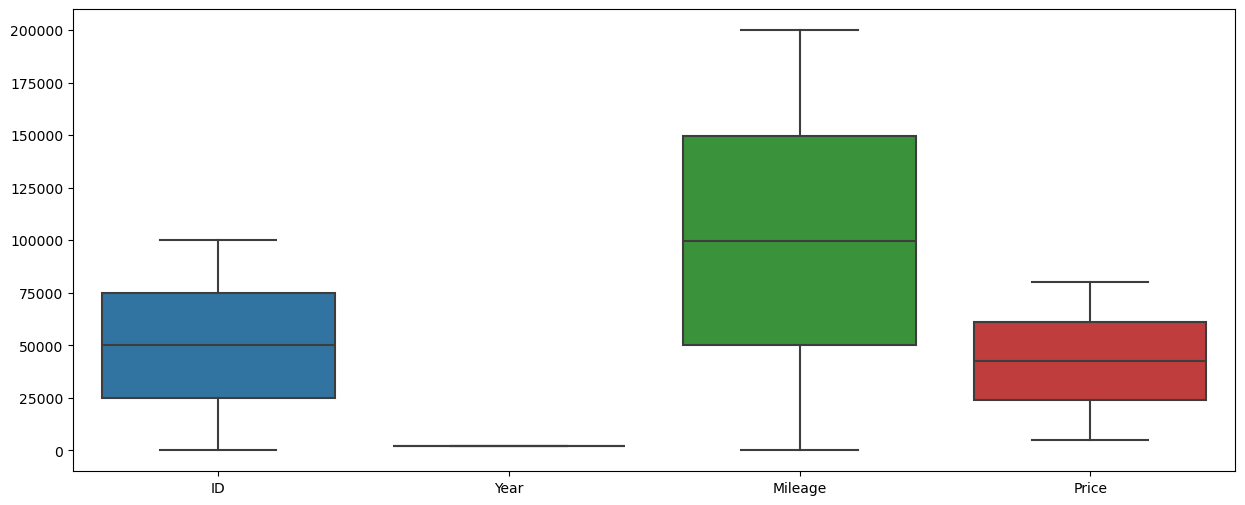

In [233]:
plt.figure(figsize=(15,6))
sns.boxplot(train)
# hàm này sẽ vẽ biểu đồ boxplot cho tất cả các biến số trong tập dữ liệu

In [234]:
upper,lower=detect_outliers(train,'Year')
print('Upper limit: ',upper)
print('Lower limit: ',lower)

Upper limit:  2038.0
Lower limit:  1974.0


<Axes: >

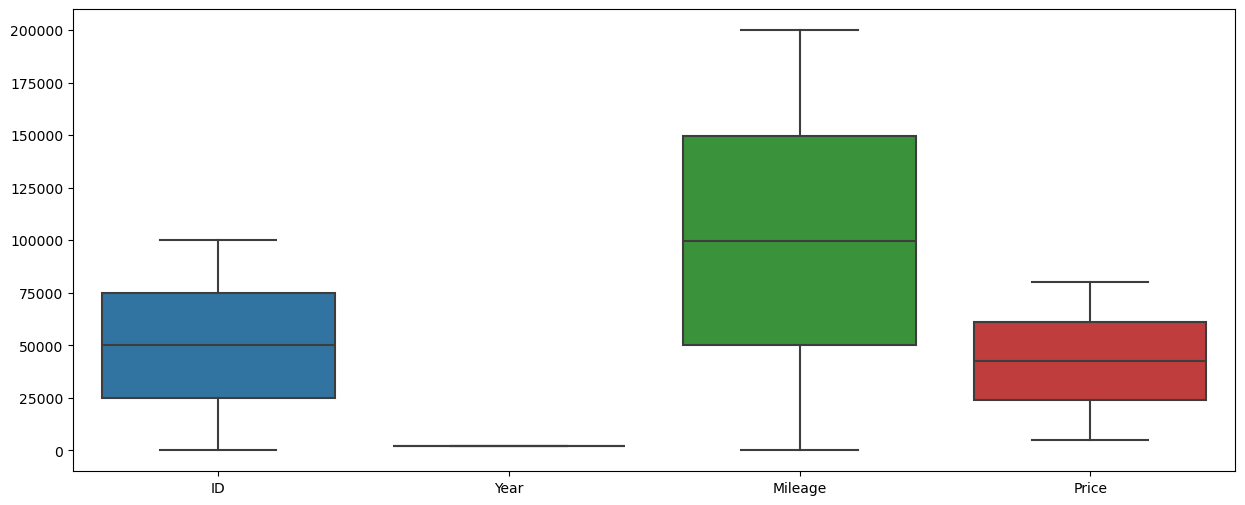

In [235]:
plt.figure(figsize=(15,6))
sns.boxplot(train)

<Axes: xlabel='Condition', ylabel='count'>

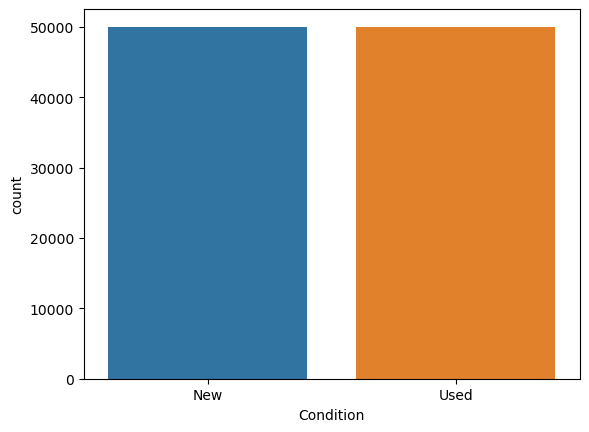

In [236]:
sns.countplot(x=train['Condition'])

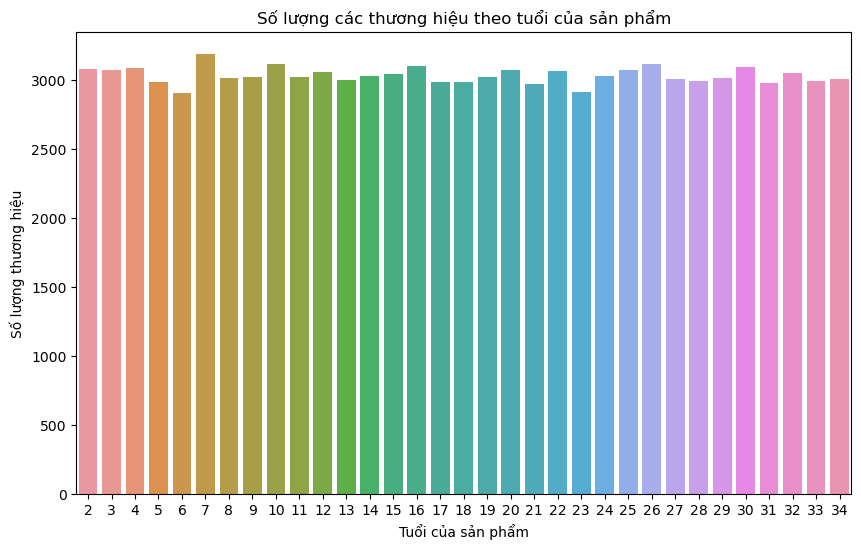

In [237]:
# Tính toán 'Year' cho DataFrame train và test
train['Year'] = 2024 - train['Year']
test['Year'] = 2024 - test['Year']

# Vẽ biểu đồ countplot với số lượng các thương hiệu theo tuổi của sản phẩm
plt.figure(figsize=(10, 6))
sns.countplot(x=train['Year'])
plt.title('Số lượng các thương hiệu theo tuổi của sản phẩm')
plt.xlabel('Tuổi của sản phẩm')
plt.ylabel('Số lượng thương hiệu')
plt.show()
# chúng ta đã vẽ biểu đồ cột với số lượng các Brand theo tuổi của sản phẩm

In [238]:
train.head()


,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,21,Blue,22932,65732,New
1,2,Jaguar,Generic Model 2,21,Silver,89937,58620,New
2,3,Land Rover,Generic Model 2,2,Green,36616,50574,New
3,4,Porsche,Generic Model 2,27,Black,82812,35436,Used
4,5,Land Rover,Generic Model 3,24,Black,184616,63880,Used


In [239]:
test.head()


,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,67094,BMW,Generic Model 1,29,Silver,58282,51669,Used
1,75836,Ford,Edge,34,Black,151004,55536,Used
2,70866,Lexus,Generic Model 2,13,Black,188875,7234,Used
3,95421,Jaguar,Generic Model 2,21,Silver,94720,35986,Used
4,93758,Volvo,Generic Model 2,20,Blue,111377,14320,New


In [248]:
# Bộ mã hóa nhãn cho dữ liệu thứ tự
encoder=LabelEncoder()
ordinal_features=['Model','Color','Condition']

for i in ordinal_features:
    train[i]=encoder.fit_transform(train[i])
    test[i]=encoder.fit_transform(test[i])

In [249]:
train.shape

(100000, 8)

In [250]:
test.shape

(9226, 8)

In [251]:
train = pd.get_dummies(train, columns=['Brand'], drop_first=True)
test  = pd.get_dummies(test,  columns=['Brand'], drop_first=True)

In [252]:
print(train.shape)
print(test.shape)

(100000, 28)
(9226, 27)


In [253]:
X=train.drop('Price',axis=1)
y=train['Price']

In [254]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,)

## Linear Regression

In [255]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [256]:
lr_pred=lr.predict(X_test)
# hàm này sẽ tính toán các giá trị dự đoán từ mô hình hồi quy tuyến tính

In [257]:
print('Training score  : {}'.format(lr.score(X_train, y_train)))
print('Test score      : {}'.format(lr.score(X_test, y_test)))
# từ kết quả này cho chúng ta thấy rằng mô hình này cho kết quả gần đúng

Training score  : 0.0004220246471157152
Test score      : -0.0004788714607508737
